# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Faiz Fadilah
- **Email:** faizfadlh28@gmail.com
- **ID Dicoding:** faiz_fadilah

## Menentukan Pertanyaan Bisnis

- Pada bulan dan tahun berapa dalam rentang lima tahun terjadi tingkat CO paling tinggi di Kota Guanyuan?
- Pada bulan apa polusi mencapai puncaknya di Kota Guanyuan setiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

## Data Wrangling

### Gathering Data

#### Load Dataset

In [2]:
#reading csv files
df= pd.read_csv("/content/PRSA_Data_Guanyuan_20130301-20170228.csv")
df.head(500)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,2013,3,21,15,185.0,196.0,32.0,97.0,1800.0,44.0,7.7,1000.0,-0.8,0.0,ENE,1.4,Guanyuan
496,497,2013,3,21,16,188.0,214.0,29.0,100.0,1700.0,43.0,7.7,999.8,-0.8,0.0,N,1.7,Guanyuan
497,498,2013,3,21,17,190.0,199.0,31.0,109.0,1800.0,38.0,6.9,1000.2,-0.1,0.0,NNW,2.3,Guanyuan
498,499,2013,3,21,18,192.0,201.0,28.0,116.0,1800.0,30.0,6.1,1001.4,0.0,0.0,N,1.1,Guanyuan


In [3]:
df['year'].min()

2013

### Assessing Data

#### Menilai dataset
Mengecek jumlah data dan tipe data pada dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Checking for Missing values
Mengecek apakah ada data yang hilang pada dataset

In [5]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

#### Checking for Duplicating Data

In [6]:
df.duplicated().sum()

0

### Cleaning Data

#### Handling Missing Values
Berdasarkan pengecekan sebelumnya, terdapat missing value di beberapa kolom, sehingga perlu dilakukan handling missing values. Untuk jumlah missing value kurang dari 1000 saya gunakan pengisian data menggunakan mean, sedangkan untuk missing value yang jumlahnya lebih dari 1000 saya menggunakan knn imputer.

In [7]:
df['PM2.5'].fillna((df['PM2.5'].mean()), inplace=True)
df['PM10'].fillna((df['PM10'].mean()), inplace=True)
df['SO2'].fillna((df['SO2'].mean()), inplace=True)
df['NO2'].fillna((df['NO2'].mean()), inplace=True)
df['TEMP'].fillna((df['TEMP'].mean()), inplace=True)
df['PRES'].fillna((df['PRES'].mean()), inplace=True)
df['DEWP'].fillna((df['DEWP'].mean()), inplace=True)
df['RAIN'].fillna((df['RAIN'].mean()), inplace=True)
df['SO2'].fillna((df['SO2'].mean()), inplace=True)
df['WSPM'].fillna((df['WSPM'].mean()), inplace=True)

terkhusus untuk kolom wd saya mengisinya dengan menggunakan nilai berdasarkan kolom lain

In [8]:
df['wd'].fillna("missing", inplace=True)

In [9]:
knn_imputer = KNNImputer(n_neighbors=5)

In [10]:
#Handling Missing Value Feature CO
data = df[['CO']].values.reshape(-1, 1)

imputed_values = knn_imputer.fit_transform(data)

imputed_data_rounded = np.round(imputed_values)

df['CO'] = imputed_data_rounded

In [11]:
#Handling Missing Value Feature O3
data = df[['O3']].values.reshape(-1, 1)

imputed_values = knn_imputer.fit_transform(data)

imputed_data_rounded = np.round(imputed_values)

df['O3'] = imputed_data_rounded

In [12]:
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [13]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


## Exploratory Data Analysis (EDA)

#### Explore Histogram for Feature PM2.5, CO, and TEMP

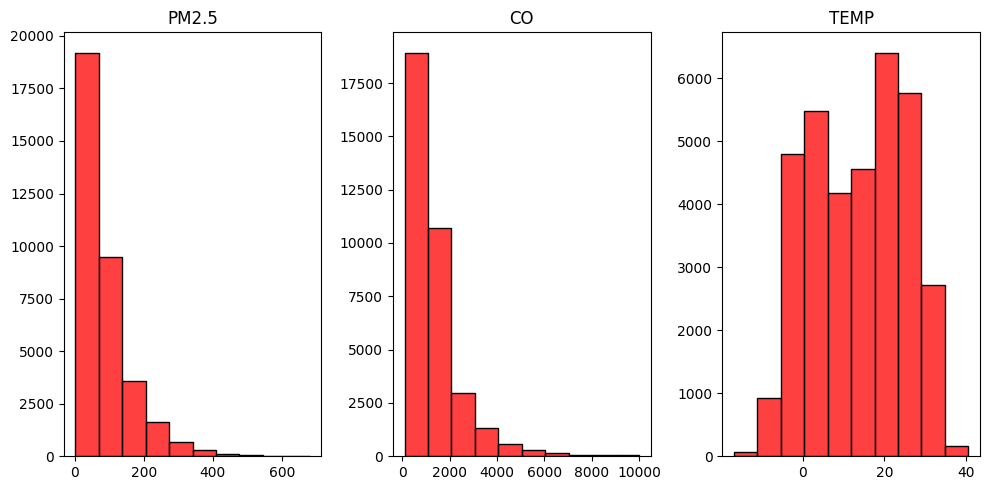

In [14]:
columns = ['PM2.5', 'CO', 'TEMP']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=df[columns[i]], ax=ax, bins=10, color='red')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

### Explore Total of PM2.5 by year
Mengecek total kadar PM2.5 setiap tahun

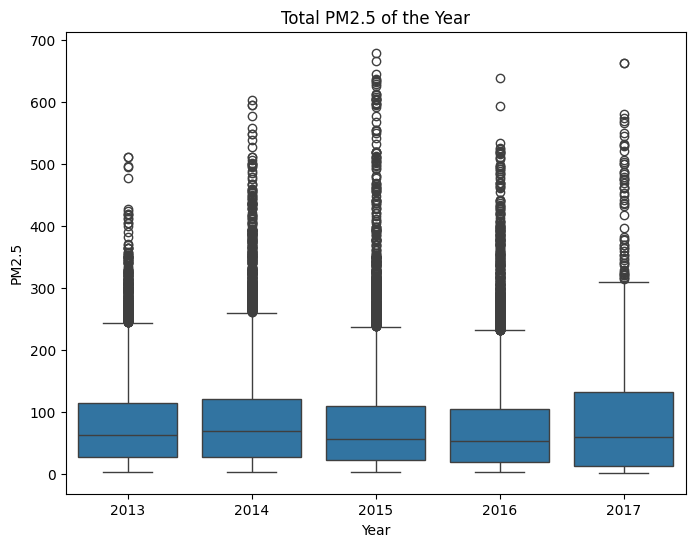

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='year', y='PM2.5', data=df)
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.title('Total PM2.5 of the Year')
plt.show()

berdasarkan visualisasi diatas, polusi tertinggi berada di tahun 2017

#### Explore Total CO by Year
Mengecek total kadar CO setiap tahun

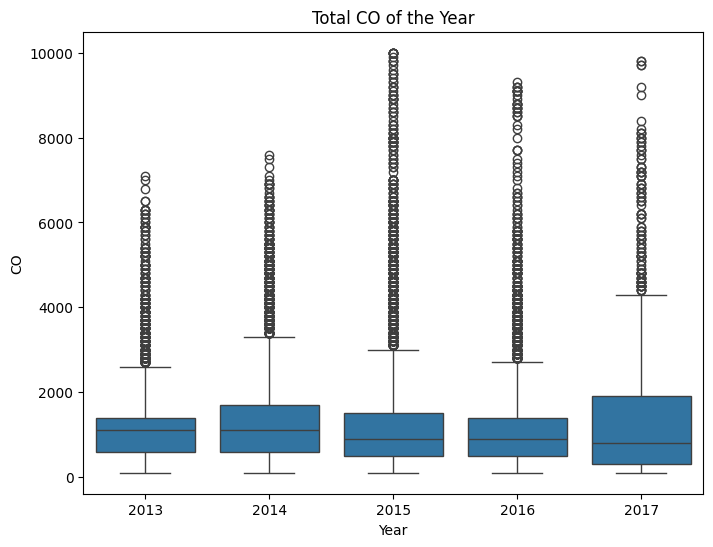

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='year', y='CO', data=df)
plt.xlabel('Year')
plt.ylabel('CO')
plt.title('Total CO of the Year')
plt.show()

Pada boxplot CO ini menunjukkan kadar CO tertinggi berada pada tahun 2017

#Explore CO Emissions Over the Years

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan dan tahun berapa dalam rentang lima tahun terjadi tingkat CO paling tinggi di Kota Guanyuan?

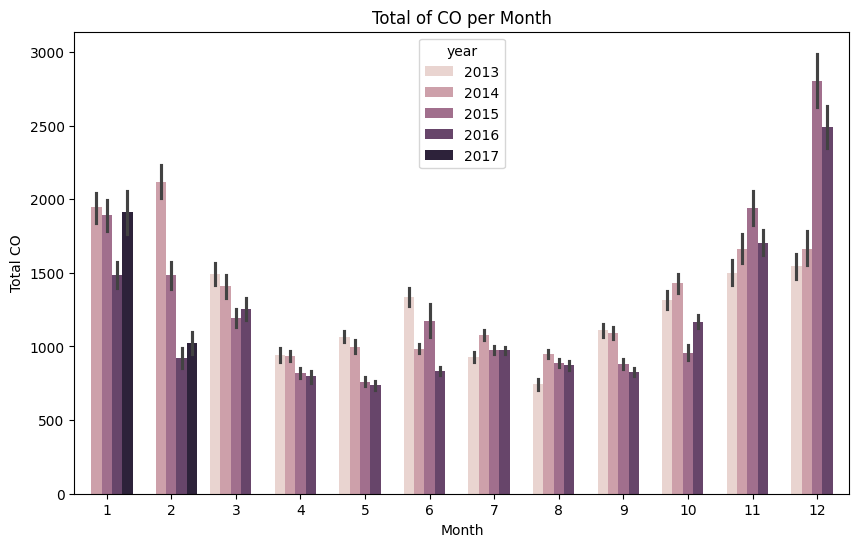

In [17]:
plt.figure(figsize=(10,6))

sns.barplot(x='month', y='CO', data=df, hue='year')

plt.xlabel("Month")
plt.ylabel("Total CO")
plt.title("Total of CO per Month")

plt.show()

Kadar CO tertinggi selama 5  tahun terkakhir berada pada bulan Desember tahun 2015

### Pertanyaan 2: Pada bulan apa polusi mencapai puncaknya di Kota Guanyuan setiap tahunnya?

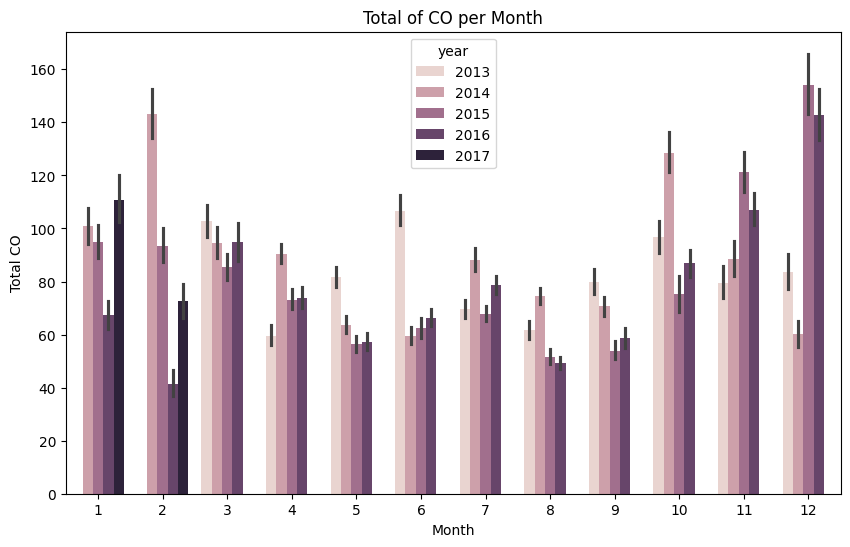

In [18]:
plt.figure(figsize=(10,6))

sns.barplot(x='month', y='PM2.5', data=df, hue='year')

plt.xlabel("Month")
plt.ylabel("Total CO")
plt.title("Total of CO per Month")

plt.show()



*   Pada tahun 2013 polusi tertinggi berada di bulan Juni
*   Pada tahun 2014 polusi tertinggi berada di bulan Februari
*   Pada tahun 2015 polusi tertinggi berada di bulan Desember
*   Pada tahun 2016 polusi tertinggi berada di bulan Desember
*   Pada tahun 2017 polusi tertinggi berada di bulan Januari





## Conclusion



1.   **Conclusion pertanyaan 1**

*   Kadar CO tertinggi selama 5  tahun terakhir berada pada bulan Desember tahun 2015

2.   **Conclusion pertanyaan 2**
*   Tingkat polusi tertinggi setiap tahunnya berbeda-beda bulan, berikut hasilnya:
*   Pada tahun 2013 polusi tertinggi berada di bulan Juni
*   Pada tahun 2014 polusi tertinggi berada di bulan Februari
*   Pada tahun 2015 polusi tertinggi berada di bulan Desember
*   Pada tahun 2016 polusi tertinggi berada di bulan Desember
*   Pada tahun 2017 polusi tertinggi berada di bulan Januari

In [19]:
df.to_csv("guanyuan_data.csv", index=False)